###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Bubble and Dew Point Calculations

This [IPython notebook](http://ipython.org/notebook.html) illustrates the use of Raoult's Law and Antoine's equation to compute the bubble and dew points for an ideal solution. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

Initialize the IPython workspace with with default settings for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(10,6)})
plt.rcParams.update({'font.size':12})
plt.rcParams.update({'lines.linewidth':1.6})

## Summary

<img src = "https://raw.githubusercontent.com/jckantor/CBE20255/master/notebooks/images/BubbleDewPointCalculations.png" align="center" width="400">

## Bubble and Dew Point Equations for Ideal Mixtures

Bubble and dew point calculations for ideal mixtures are all about solving a fixed set of equations. If we have $N$ chemical species, and refer to the liquid phase mole fractions as $x_1, \ldots, x_N$ and the vapor phase mole fractions as $y_1, \ldots, y_N$, then two of these equations are

$$x_1 + x_2 + \cdots + x_N = 1$$

and

$$y_1 + y_2 + \cdots + y_N = 1$$

The remaining equations come from Raoult's law. For each of the $n = 1, 2, \ldots, N$ species we have an equation

$$ y_n P = x_n P_n^{sat}(T)$$

where $P_n^{sat}(T)$ is determined from experimental data or from a correlation such as Antoine's equation. This gives us a total $N+2$ equations. 

The unknown variables are the $N$ values of $x_n$, the $N$ values of $y_n$, plus temperature $T$ and pressure $P$ -- a total $2N + 2$ variables. With this as context, we can identify two types of problems.

#### Bubble Point Equations

If the composition of the liquid phase is known, then the equilibrium equations can be solved for the unknown vapor phase composition

$$y_n = x_n \frac{P_n^{sat}(T)}{P}$$

Substituting these values into the equation $y_1 + y_2 + \cdots + y_N = 1$ gives an equation.

$$ x_1\frac{P_1^{sat}(T)}{P} + \cdots + x_N \frac{P_N^{sat}(T)}{P} = 1$$

If $P$ is known, then the equilibrium value of $T$ is a root to this equation that can be found using standard root-finding functions in the Python or Matlab libraries.

If $T$ is known, the solution for $P$ is simply

$$ P = x_1 P_1^{sat}(T) + x_2 P_2^{sat}(T) + \cdots + x_N P_N^{sat}(T)$$

Once both $T$ and $P$ are known, the vapor phase composition can be computed by substituting those values back into the first equation.

#### Dew Point Equations

If the composition of the vapor phase is known, then the equilibrium equations can be solved for the unknown vapor liquid phase composition

$$x_n = y_n \frac{P}{P_n^{sat}(T)}$$

Substituting these values into the equation $x_1 + x_2 + \cdots + x_N = 1$ gives an equation

$$ y_1\frac{P}{P_1^{sat}(T)} + \cdots + y_N \frac{P}{P_N^{sat}(T)} = 1$$

If $P$ is known, then the equilibrium value of $T$ is a root to this equation that can be found using standard root-finding functions in the Python or Matlab libraries.

If $T$ is known, the solution for $P$ is 

$$\frac{1}{P} = \frac{y_1}{P_1^{sat}(T)} + \frac{y_2}{P_2^{sat}(T)} + \cdots + \frac{y_N}{P_N^{sat}(T)}$$

Once both $T$ and $P$ are known, the liquid phase composition can be computed by substituting those values back into the first equation.

## Bubble Point Calculations for Binary Mixtures

For an ideal binary mixture of components $A$ and $B$, from Raoult's law the bubble point temperature must satisfy

$$P = x_A P_A^{sat}(T) + x_B P_B^{sat}(T)$$

where $x_A P_A^{sat}(P)$ and $x_B P_B^{sat}(P)$ are the partial pressures of $A$ and $B$, respectively. This relationship is the basis for an interative procedure for computing the bubble point temperature.

Step 1: Guess the temperature.

Step 2: Compute the  'K-factors'

$$K_A = \frac{P^{sat}_A(T)}{P}\qquad\mbox{and}\qquad K_B = \frac{P^{sat}_B(T)}{P}$$

Step 3: Compute the vapor phase mole fractions 

$$y_A = K_A x_A\qquad\mbox{and}\qquad y_B = K_B x_B$$

Step 4: Check if $y_A + y_B = 1$. Adjust the temperature and repeat until the vapor phase mole fractions sum to one.

The procedure is demonstrated in the following video.

### Solution by Manual Iteration

We're given a binary mixture composed of acetone and ethanol at atmospheric pressure where the liquid phase mole fraction of acetone is 0.40. The problem is to find the equilibrium temperature and the composition of the vapor phase.

In [1]:
A = 'acetone'
B = 'ethanol'

P = 760
xa = 0.4
xb = 1 - xa

We will use Antoine's equation to compute the saturation pressures for the pure components. These function are stored as entries in a simple Python dictionary.

In [2]:
# Antoine's equations. T [deg C], P [mmHg]

Psat = dict()
Psat['acetone'] = lambda T: 10**(7.02447 - 1161.0/(224 + T))
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(222.65 + T))

The next cell performs the calculations outlined in the video above. Execute this cell with different values of `T` until the vapor phase mole fractions sum to one.

In [5]:
T = 65

Ka = Psat[A](T)/P
Kb = Psat[B](T)/P

ya = Ka*xa
yb = Kb*xb

print ya + yb

0.880884611444


### Solution with a Root-Finding Function

To compute the bubble point for a binary mixture we need to solve the equation

$$P = x_A P^{sat}_A(T_{bubble}) + x_B P^{sat}_B(T_{bubble})$$

where $P$ and $x_A$ (and therefore $x_B = 1 - x_A$) are known. The bubble point composition is given by

$$y_A = \frac{x_A P^{sat}_A(T)}{P}\qquad\mbox{and}\qquad y_B = \frac{x_B P^{sat}_B(T)}{P}$$

Matlab and Python functions for solving equations rely on *root-finding* methods, that is, methods that find the *zeros* of a function. In this case we need to write our problem as

$$x_A \frac{P^{sat}_A(T)}{P} + x_B\frac{P^{sat}_B(T)}{P} - 1 = 0$$

Here we use the `fsolve` function from the scipy.optimize library to return the root of this equation. Note that `fsolve` returns a list of roots, so the terminal `[0]` on the expression selects the first root (and presumably only) of the bubble point equation.

In [8]:
from scipy.optimize import brentq

brentq(lambda T: xa*Psat[A](T)/P + xb*Psat[B](T)/P - 1.0 ,0,100)

68.5195836108029

In [11]:
def Tbub((xa,xb)) :
    return brentq(lambda T: xa*Psat[A](T)/P + xb*Psat[B](T)/P - 1.0 ,0,100)

print "Bubble point temperature = {:6.3f} [deg C]".format(Tbub((xa,xb)))

ya = xa*Psat[A](Tbub((xa,xb)))/P
yb = xb*Psat[B](Tbub((xa,xb)))/P

print "Bubble point composition = {:.3f}, {:.3f}".format(ya,yb)

Bubble point temperature = 68.520 [deg C]
Bubble point composition = 0.598, 0.402


### Bubble Point Curve for a Txy Diagram

It's a relatively simply matter to encapsulate the bubble point calculation into a function that, given the liquid phase mole fraction for an ideal binary mixture, uses a root-finding procedure to return the bubble point temperature.

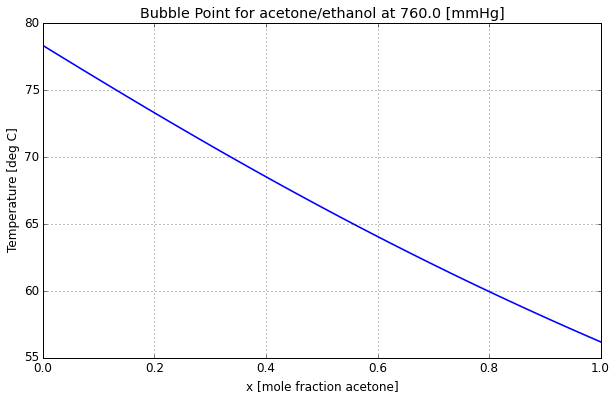

In [12]:
x = np.linspace(0,1)
plt.plot(x,map(Tbub,zip(x,1-x)))
plt.xlabel('x [mole fraction {:s}]'.format(A))
plt.ylabel('Temperature [deg C]')
plt.title('Bubble Point for {:s}/{:s} at {:5.1f} [mmHg]'.format(A,B,P))
plt.grid();

## Dew Point Calculations for a Binary Mixture

To compute the dew point for a binary mixture we need to solve the equation

$$y_A\frac{P}{P^{sat}_A(T)} + y_B\frac{P}{P^{sat}_B(T)} - 1 = 0$$

where $P$ and $y_A$ (and therefore $y_B = 1 - y_A$) are known. The dew point composition is given by

$$x_A = y_A\frac{P}{P^{sat}_A(T)}\qquad\mbox{and}\qquad x_B = y_B\frac{P}{P^{sat}_B(T)}$$

Matlab and Python functions for solving equations rely on *root-finding* methods, that is, methods that find the *zeros* of a function. Here we use the `fsolve` function from the scipy.optimize library to return the root of the dew point equation. Note that `fsolve` returns a list of roots, so the terminal `[0]` on the expression selects the first root (and presumably only) of the bubble point equation.

In [13]:
def Tdew((ya,yb)):
    return brentq(lambda T:ya*P/Psat[A](T) + yb*P/Psat[B](T) - 1.0,0,100)

print "Dew point temperature = {:6.3f} [deg C]".format(Tdew((ya,yb)))

xa = ya*P/Psat[A](Tdew((ya,yb)))
xb = yb*P/Psat[B](Tdew((ya,yb)))

print "Dew point composition = {:.3f}, {:.3f}".format(xa,xb)

Dew point temperature = 68.520 [deg C]
Dew point composition = 0.400, 0.600


### Dew Point Curve on the Txy diagram

As shown above for bubble point calculations, the dew point curve on the Txy diagram can be plotted by mapping the Tdew function onto a grid of mole fractions.

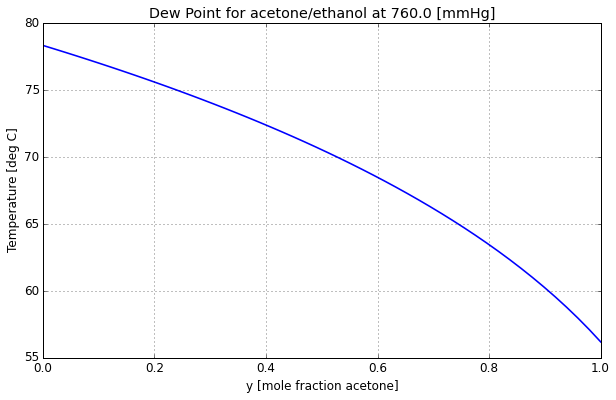

In [14]:
y = np.linspace(0,1)
plt.plot(y,map(Tdew,zip(y,1-y)))
plt.xlabel('y [mole fraction {:s}]'.format(A))
plt.ylabel('Temperature [deg C]')
plt.title('Dew Point for {:s}/{:s} at {:5.1f} [mmHg]'.format(A,B,P))
plt.grid();